## Install required packages

In [ ]:
!pip install sdv --quiet
!pip install openai --quiet
!pip install datasets --quiet
!pip install mimesis --quiet
!pip install nltk --quiet
!pip install wordcloud --quiet
!pip install mlflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.2/143.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.7/170.7 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.5 MB/s eta 0:00:00
ERROR: pip's dependency resolve

## NLTK download packages

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Import mimesis for fake data generation

In [ ]:
from mimesis import Person
from mimesis import Generic
from mimesis import Fieldset
from mimesis.locales import Locale
from mimesis.enums import Gender

## Import all the necessary library

In [ ]:
import numpy as np
import openai
import os
import csv
import json
from openai import OpenAI
import pandas as pd
import random
import string
from datetime import datetime, timedelta
from datasets import load_dataset
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Set a random seed for reproducibility
np.random.seed(42)
# Load  API key from an environment variable or secret management service
openai.api_key = ""
client = OpenAI(api_key="")

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import mlflow

# **Synthetic data Generation**

## Generate a fake person detail

In [ ]:
def get_person_detail():
  """
    Generate random person details including full name, email, and occupation.

    Returns:
        Tuple[str, str, str]: A tuple containing the generated full name, email, and occupation.
  """
  # List of locales for generating person details
  locations = [Locale.CS,Locale.EN,Locale.DE,Locale.ES,Locale.FA,Locale.SV,Locale.FI,Locale.HU]
  # List of genders for generating person details
  genders = [Gender.FEMALE,Gender.MALE]

  # Randomly choose a location and gender
  location = random.choice(locations)
  gender = random.choice(genders)
  # Create a Generic instance with the chosen locatio
  data = Generic(location)
  return data.person.full_name(gender=gender),data.person.email(),data.person.occupation()

## Download a huggingface spam/ham dataset for additional data

In [ ]:
dataset = load_dataset("SetFit/enron_spam")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/repocard.py:105: UserWarning: Repo card metadata block was not found. Setting CardData to empty.
  warnings.warn("Repo card metadata block was not found. Setting CardData to empty.")


## Get train,eval datasets

In [ ]:
train_dataset = dataset['train']
eval_dataset = dataset['test']

## Define suffix,company categories, prefix for phishing email generation

In [ ]:
# @title
domain_suffixes = [".com", ".net", ".org", ".co", ".io", ".xyz", ".info", ".biz", ".us",".co.in",".de",".fr"]
company_categories = {
    'Mail': ['PayPal', 'Microsoft', 'Yahoo', 'Outlook', 'Gmail','Ravenmail'],
    'Ecommerce': ['Amazon', 'Apple', 'Netflix', 'eBay', 'Flipkart', 'Jio', 'Paytm', 'Ola', 'Zomato', 'Swiggy', 'Walmart'],
    'Entertainment': ['Netflix', 'Hulu', 'Zee Entertainment','iCloud', 'Comcast','Prime'],
    'Finance': ['Phonepe','Discover','Fidelity','Bank of America', 'Wells Fargo', 'American Express', 'Citibank', 'Capital One', 'PNC Bank', 'HDFC', 'ICICI', 'Axis', 'Bajaj', 'LIC', 'SBI'],
    'Trading': ['Coinbase', 'Binance', 'Coindcx','Zerodha','Coinbase','Robinhood','Groww'],
    'Professional': ['LinkedIn','Naukri','Indeed'],
    'Antivirus':['Kaspersky','Avira','Norton'],
    'Socialmedia':['Facebook','Twitter', 'Instagram','Snapchat', 'AOL','Skype'],
    'Others': ['Google', 'Dropbox','Steam', 'Target']
}
category_weight = [1] * len(company_categories)
phishing_suffixes = [
    'mail-security', 'billing',
   'notification', 'verification',  'customer-service',  'identity', 'recovery',
    'registration', 'account-verification', 'account-security',
    'alert', 'update', 'online-help', 'assistance',  'maintenance'
]

suffix_weight = [1] * len(phishing_suffixes)
category_prefixes = {
    'Mail': ['noreply', 'admin', 'support', 'billing', 'account', 'verification', 'update', 'notification', 'service', 'alert'],
    'Ecommerce': ['noreply', 'billing', 'notification', 'feedback', 'helpdesk', 'offers'],
    'Entertainment': ['notification', 'update', 'promo'],
    'Finance': ['security', 'notification', 'alert', 'payment', 'invoice', 'billing'],
    'Trading': ['alert', 'notification', 'update', 'security', 'trade', 'service'],
    'Professional': ['notification', 'update', 'career', 'jobs', 'opportunity', 'service'],
    'Antivirus': ['security', 'notification', 'alert', 'update',  'service'],
    'Social Media': ['notification', 'alert', 'update'],
    'Others': ['notification', 'update', 'alert', 'info', 'service', 'enquiry']
}

suspicious_prefixes = [
    "noreply",
    "admin",
    "support",
    "billing",
    "info",
    "security",
    "account",
    "verification",
    "update",
    "notification",
    "service",
    "alert",
    "payment",
    "invoice",
    "feedback",
    "enquiry",
    "helpdesk",
    "offers",
]

prefix_suffix_mapping = {
    "noreply": ["global"],
    "admin": ["secure-login"],
    "support": ["customer-support"],
    "billing": ["billing-issue", "payment-request"],
    "info": ["update-info"],
    "security": ["secure-login", "account-security", "security-update"],
    "account": ["account-verify", "account-login", "account-verification"],
    "verification": ["account-verify", "verify-identity", "verify-account", "account-verification"],
    "update": ["update-info", "security-update"],
    "notification": ["transaction-alert", "account-login", "account-activity", "service-notification", "security-update", "suspicious-activity", "login-attempt", "verify-account", "account-verification", "billing-issue", "payment-request", "urgent-action"],
    "service": ["customer-support", "service-notification"],
    "alert": ["secure-login", "transaction-alert", "security-update", "suspicious-activity", "login-attempt", "urgent-action"],
    "payment": ["payment-confirm", "payment-request"],
    "invoice": ["transaction-alert"],
    "feedback": ["customer-support"],
    "enquiry": [""],
    "helpdesk": ["customer-support"],
    "offers": ["urgent-action"]
}
prefix_weight = [1] * len(suspicious_prefixes)

In [ ]:
def get_string(input_data, probability=1):
    """
    Generates a random string from the given input data with a specified probability.

    Args:
        input_data (list): List of strings to choose from.
        probability (float, optional): Probability of generating a string from the input data. Defaults to 1.

    Returns:
        str or None: The randomly chosen string or None if the random float exceeds the probability.
    """
    # Generate a random float between 0 and 1
    random_float = random.random()

    # Equal weights for all input data elements
    weights = [1] * len(input_data)

    # Check if the random float is less than the specified probability
    if random_float < probability:
        # Choose a random string from the input data based on the weights
        data = random.choices(input_data, weights=weights)[0]
        return data

    return None

def get_phishing_suffix(probability=0.3):
    """
    Generates a random phishing suffix with a specified probability.

    Args:
        probability (float, optional): Probability of generating a phishing suffix. Defaults to 0.3.

    Returns:
        str or None: The randomly chosen phishing suffix or None if probability condition is not met.
    """
    # Call get_string function with phishing_suffixes as input data
    return get_string(phishing_suffixes, probability=probability)

def get_phishing_prefix(probability=1):
    """
    Generates a random phishing prefix.

    Args:
        probability (float, optional): Probability of generating a phishing prefix. Defaults to 1.

    Returns:
        str or None: The randomly chosen phishing prefix.
    """
    # Call get_string function with suspicious_prefixes as input data
    return get_string(suspicious_prefixes, probability=probability)


## Methods for generating the phishing mail body and subject based on template

In [ ]:
# @title
def get_phishing_subject(prefix):
    """
    Generate the subject of a phishing email based on the provided prefix.

    Args:
    - prefix (str): The suspicious email prefix.

    Returns:
    - str: The subject of the phishing email.
    """
    subject_mapping = {
    "noreply": [
        "Your Account Has Been Compromised: Immediate Action Required",
        "Security Alert: Unauthorized Access Detected",
        "Important Account Update: Verify Your Information Now",
        "Urgent: Your Account Is Suspended Until Verification",
        "Action Needed: Verify Your Account to Prevent Lockout",
        "Critical Security Update: Verify Your Account",
        "Account Breach Alert: Immediate Action Required",
        "Warning: Your Account Is At Risk",
        "Your Account Security Is At Risk: Verify Now",
        "Attention: Verify Your Account or Lose Access"
    ],
    "admin": [
        "Admin Access Required: Verify Your Credentials Now",
        "Urgent: Admin Access Suspension Alert",
        "Security Breach: Admin Account Compromised",
        "Attention: Your Admin Access Is At Risk",
        "Critical Alert: Admin Access Verification Needed",
        "Your Admin Rights Are At Risk: Verify Now",
        "Admin Account Compromised: Immediate Action Required",
        "Important: Verify Your Admin Credentials",
        "Your Admin Account Is Suspended: Action Needed",
        "Admin Access Breach: Immediate Verification Required"
    ],
    "support": [
        "Urgent: Account Suspension Notice - Verify Your Account Now",
        "Your Account Has Been Flagged: Immediate Support Required",
        "Critical: Contact Support Immediately to Prevent Lockout",
        "Important: Account Support Required for Security Reasons",
        "Account Compromised: Contact Support for Assistance",
        "Action Required: Account Support Ticket Opened",
        "Security Alert: Account Support Needed Immediately",
        "Your Account Is At Risk: Contact Support Now",
        "Support Request: Verify Your Account to Prevent Suspension",
        "Immediate Action Required: Contact Support Now"
    ],
    "billing": [
        "Urgent: Unpaid Invoice Reminder - Pay Now to Avoid Service Disruption",
        "Action Needed: Overdue Invoice - Payment Required Immediately",
        "Invoice Payment Overdue: Immediate Action Required",
        "Important: Your Account Will Be Suspended Due to Unpaid Invoice",
        "Reminder: Unsettled Invoice - Pay Now to Avoid Penalties",
        "Critical Alert: Unpaid Invoice Notice - Immediate Payment Required",
        "Your Account Is At Risk: Pay Your Outstanding Invoice Now",
        "Account Suspension Warning: Unpaid Invoice Alert",
        "Immediate Attention Required: Unsettled Invoice - Pay Now",
        "Final Reminder: Unpaid Invoice - Immediate Payment Required"
    ],
    "info": [
        "Urgent: Account Update Required - Verify Your Information Now",
        "Action Needed: Important Account Update - Verify Your Details",
        "Your Account Information Needs Verification: Immediate Action Required",
        "Critical Update: Verify Your Account Information to Prevent Suspension",
        "Security Alert: Account Information Update Required Immediately",
        "Attention: Verify Your Account Information Now to Avoid Disruption",
        "Important: Your Account Details Are Outdated - Verify Now",
        "Verify Your Account: Important Update Required for Security Reasons",
        "Your Account Is Incomplete: Complete Your Information Now to Avoid Lockout",
        "Immediate Action Required: Verify Your Account Information Now"
    ],
    "security": [
        "Security Breach Alert: Unauthorized Access Detected",
        "Critical Security Alert: Immediate Account Verification Required",
        "Your Account Is Compromised: Immediate Action Required",
        "Attention: Security Breach Detected - Verify Your Account Now",
        "Security Notice: Account Security Compromised - Action Needed",
        "Urgent Security Update: Verify Your Account to Prevent Lockout",
        "Important: Your Account Security Is At Risk - Verify Now",
        "Your Account Is Under Attack: Immediate Verification Required",
        "Suspicious Activity Detected: Verify Your Account Immediately",
        "Your Account Is Compromised: Take Action Now to Secure It"
    ],
    "account": [
        "Attention: Account Verification Required - Immediate Action Needed",
        "Critical Alert: Account Verification Needed to Prevent Lockout",
        "Your Account Needs Verification: Take Action Now",
        "Important: Verify Your Account Information Immediately",
        "Urgent: Account Verification Required to Avoid Suspension",
        "Account Verification Notice: Immediate Action Required",
        "Account Compromised: Verify Your Account to Prevent Lockout",
        "Your Account Is At Risk: Verify Your Information Now",
        "Your Account Is Incomplete: Complete Verification to Avoid Suspension",
        "Immediate Attention Required: Verify Your Account Now"
    ],
    "verification": [
        "Urgent: Account Verification Required - Immediate Action Needed",
        "Important: Verify Your Account to Prevent Lockout",
        "Security Alert: Account Verification Needed Immediately",
        "Your Account Needs Verification: Take Action Now",
        "Account Verification Notice: Immediate Action Required",
        "Attention: Verify Your Account to Avoid Suspension",
        "Verify Your Account: Important Security Measure",
        "Your Account Is Incomplete: Complete Verification Now",
        "Immediate Attention Required: Verify Your Account Information",
        "Critical Alert: Verify Your Account to Prevent Unauthorized Access"
    ],
    "update": [
        "Action Needed: Important Account Update - Verify Now",
        "Urgent: Account Update Required - Immediate Action Needed",
        "Your Account Information Needs Update: Take Action Now",
        "Important: Verify Your Account Details Immediately",
        "Your Account Is Outdated: Update Information to Avoid Suspension",
        "Attention: Update Your Account Information Now to Prevent Lockout",
        "Account Update Alert: Immediate Action Required",
        "Critical Update: Verify Your Account to Avoid Disruption",
        "Your Account Needs Attention: Update Information Immediately",
        "Immediate Action Required: Update Your Account Information Now"
    ],
    "notification": [
        "Urgent: Account Notification Requires Immediate Action",
        "Important: Action Needed for Critical Account Notification",
        "Your Account Has Received a Notification: Immediate Attention Required",
        "Attention: Urgent Action Needed for Account Notification",
        "Notification Alert: Immediate Verification Required",
        "Your Account Has a Critical"
        ],
    "feedback": [
        "We value your feedback! Take our quick survey for a chance to win prizes",
        "Your opinion matters! Complete our feedback form for exclusive rewards",
        "Improve our services! Share your feedback and get special discounts",
        "Last chance to share your feedback! Claim your reward now",
        "Important: Your feedback is requested for service improvement"
    ],
    "enquiry": [
        "Urgent enquiry: Verify your account details to prevent service disruption",
        "Action required: Complete our customer enquiry form to avoid account suspension",
        "Important: Verify your account information for enquiry resolution",
        "Your enquiry is pending: Confirm your details now to proceed",
        "Immediate action required: Verify your account to address your enquiry"
    ],
    "offers": [
        "Exclusive offers just for you! Claim now before they're gone",
        "Limited-time offer: Unlock special discounts with our exclusive deals",
        "Act fast! Grab these amazing offers before they expire",
        "Unlock hidden offers: Verify your account to access premium deals",
        "Don't miss out! Get access to exclusive offers by verifying your account"
        "Exclusive Trading Opportunity: Limited-time Offer Inside!"
        "Your Chance to Win Big in the Stock Market: Act Now!"
        "Unlock Premium Trading Tips: Sign Up Today for Free"
        "Get Rich Quick with Our Proven Trading Strategy"
        "Don't Miss Out on Profitable Trades: Join Us Now!"
    ],
    "Service": [
        "Important service update: Verify your account to avoid disruption",
        "Action required: Verify your account details for uninterrupted service",
        "Immediate attention required: Confirm your account information for service continuity",
        "Service alert: Verify your account to prevent suspension",
        "Your service status: Verify your account details now to continue using our platform"
    ],
    "payment": [
        "Urgent payment notice: Confirm your account details for payment processing",
        "Payment confirmation required: Verify your account to release funds",
        "Important: Verify your account information for payment validation",
        "Payment alert: Action required to avoid account suspension",
        "Your payment status: Verify your account details now for payment completion"
    ],
    "invoice": [
        "Important invoice notification: Verify your account details for billing confirmation",
        "Action required: Confirm your account information to process your invoice",
        "Invoice confirmation needed: Verify your account details for billing validation",
        "Invoice alert: Verify your account to avoid billing issues",
        "Your invoice status: Verify your account details now for billing completion"
    ],
    "alert": [
        "Security alert: Verify your account to protect against unauthorized access",
        "Urgent alert: Confirm your account details to prevent account compromise",
        "Account security notice: Verify your account information for enhanced protection",
        "Security breach detected: Action required to secure your account",
        "Your account safety: Confirm your details now to safeguard your account"
    ],
    "helpdesk": [
        "Important helpdesk notice: Verify your account to receive support",
        "Urgent helpdesk message: Confirm your account details for assistance",
        "Action required: Verify your account information for helpdesk support",
        "Helpdesk alert: Verify your account to resolve your issue",
        "Your helpdesk request: Confirm your details now for immediate assistance"
    ]
    }

    return get_string(subject_mapping.get(prefix.lower(), ["YOUR ACCOUNT IS GOING TO BE DELETED. URGENT ACTION REQUIRED"]))

def get_phishing_body(prefix, recipient):
    """
    Generate the body of a phishing email based on the provided prefix.

    Args:
    - prefix (str): The suspicious email prefix.
    - recipient (str): The recipient's name.

    Returns:
    - str: The body of the phishing email.
    """
    body_mapping = {
        "noreply": f"""
                    Dear {recipient},

                    Our records indicate that your account security settings require an urgent update. To ensure the continued security of your account, please click the link below to verify your information.

                    [Verify Now]

                    Thank you,
                    Account Security Team
                    """,
        "admin": f"""
                  Dear {recipient},

                  Due to recent system updates, we require all users to verify their admin access credentials. Please click the link below to complete the verification process.

                  [Verify Admin Access]

                  Regards,
                  System Admin Team
                  """,
        "support": f"""
                  Dear Valued Customer,

                  We regret to inform you that your account has been temporarily suspended due to suspicious activity. Please click the link below to contact our support team and resolve this issue.

                  [Contact Support]

                  Best Regards,
                  Support Team
                  """,
        "billing": f"""
                  Dear {recipient},

                  We noticed that your latest invoice remains unpaid. Failure to settle this invoice may result in account suspension. Please click the link below to make payment and avoid any disruption to your services.

                  [Pay Now]

                  Regards,
                  Billing Department
                  """,
        "info": f"""
                Dear {recipient},

                Our records indicate that some information in your account profile needs updating. Please click the link below to update your account details to avoid service interruptions.

                [Update Account Info]

                Thank you,
                Account Management Team
                """,
        "security": f"""
                  Dear {recipient},

                  Our security systems have detected unauthorized access attempts to your account. To secure your account, please click the link below to verify your identity and review recent activity.

                  [Verify Account Security]

                  Best Regards,
                  Security Team
                  """,
        "account": f"""
                    Dear {recipient},

                    Your account requires immediate verification to maintain access to essential services. Please click the link below to verify your account information.

                    [Verify Account Now]

                    Regards,
                    Account Management Team
                    """,
        "verification": f"""
                      Dear Valued Customer,

                      We need to verify your account to ensure the security of your information. Please click the link below to complete the verification process.

                      [Verify Account]

                      Regards,
                      Verification Team
                      """,
        "update": f"""
                  Dear {recipient},

                  We have made changes to our systems and require you to update your account information. Please click the link below to update your details.

                  [Update Account]

                  Regards,
                  Account Update Team
                  """,
        "notification": f"""
                  Dear {recipient},

                  You have received an important notification regarding your account. Please log in to your account to view the details and take necessary action.

                  [View Notification]

                  Regards,
                  Account Notification Team
                  """,
         "service": "Subject: Urgent: Service Disruption Notification\n\nDear [Recipient],\n\nWe regret to inform you that there has been a disruption in our service affecting your account. To ensure uninterrupted access, please click on the link below to verify your account details.\n\n\n\nFailure to verify your account within the next 24 hours may result in permanent suspension. We apologize for any inconvenience caused.\n\nBest regards,\n[Sender]",

        "alert": f"Dear {recipient},\n\nWe have detected unauthorized access attempts on your account. For your security, please click the link below to verify your identity and secure your account.\n\nIf you did not initiate these actions, please contact our support team immediately to prevent further unauthorized access.\n\nSincerely,\n[Sender]",

        "payment": f"Dear {recipient},\n\nWe regret to inform you that there was an issue processing your recent payment. To avoid service interruption, please click the link below to update your payment information.\n\Thank you for your prompt attention to this matter.\n\nWarm regards,\n[Sender]",

        "invoice": f"Dear {recipient},\n\nThis is a reminder that your invoice #[Invoice Number] is overdue. Failure to settle this invoice within the next 48 hours will result in additional charges. Please click the link below to view and pay your invoice.\n\n\n\nThank you for your cooperation.\n\nBest regards,\n[Sender]",

        "feedback": f"Dear {recipient},\n\nWe value your opinion and would appreciate if you could take a moment to provide feedback on your recent experience with us. Click the link below to access our short survey.\n\nnYour feedback helps us serve you better. Thank you for your participation!\n\nWarm regards,\n[Sender]",

        "enquiry": f"Dear {recipient},\n\nWe recently received an enquiry related to your account. Please click the link below to review and respond to this enquiry.\n\n\n\nThank you for your prompt attention to this matter.\n\nSincerely,\n[Sender]",

        "helpdesk": f"Dear {recipient},\n\nOur system has detected unusual activity on your account. To secure your account and prevent unauthorized access, please click the link below to verify your identity.\n\nIf you need further assistance, please contact our helpdesk immediately.\n\nBest regards,\n[Sender]",

        "offers": f"Dear {recipient},\n\nCongratulations! You have been selected for an exclusive offer as a valued customer. Click the link below to claim your reward now!\n\n\n\nDon't miss out on this limited-time offer. Act fast!\n\nWarm regards,\n[Sender]"
    }
    return body_mapping.get(prefix.lower(), "Invalid prefix. No body available.")

def main():
    recipient_name = "John Doe"
    suspicious_prefix = random.choice(["noreply", "admin", "support", "billing", "info", "security", "account", "verification", "update", "notification"])

    subject = get_phishing_subject(suspicious_prefix)
    body = get_phishing_body(suspicious_prefix, recipient_name)

    print("Subject:", subject)
    print("Body:", body)


## Method to generate a similar looking string(Phishing email ids have in common)

In [ ]:
# @title
def generate_similar_string(input_string, probability):
    """Generate a realistic-looking string by using similar-looking characters with a probability of transformation."""
    # Define a mapping of similar characters
    similar_characters = {
        'a': ['a', 'á', 'à', 'â', 'ä', 'ã', 'ā', 'ą'],
        'b': ['b',  'ß'],
        'c': ['c', 'ç', 'ć', 'č'],
        'e': ['e', 'é', 'è', 'ê', 'ë', 'ē', 'ę'],
        'g': ['g', 'ğ', 'ġ', 'ģ'],
        'i': ['i', 'í', 'ì', 'î', 'ï', 'ī', 'į'],
        'k': ['k', 'κ', 'ķ'],
        'l': ['l', '1', 'i', '|'],
        'm': ['m', 'n'],
        'n': ['n', 'm'],
        'o': ['o', 'ó', 'ò', 'ô', 'ö', 'õ', 'ø', 'ō', 'ő', 'œ'],
        'p': ['p', 'q', 'b', 'd'],
        'r': ['r', 'ř'],
        's': ['s', 'š', 'ş', 'ș', 'ś'],
        't': ['t', 'ŧ', 'ț', 'ţ'],
        'u': ['u', 'ú', 'ù', 'û', 'ü', 'ū', 'ů'],
        'v': ['v', 'w', 'u'],
        'w': ['w', 'v', 'u'],
        'x': ['x', 'χ'],
        'y': ['y', 'ý', 'ÿ'],
        'z': ['z', 'ž', 'ź', 'ż']
    }

    # Check if the random number is less than the probability
    if random.random() < probability:
        # Randomly select a character index to transform
        index = random.randint(0, len(input_string) - 1)
        char = input_string[index].lower()
        # Transform the selected character
        transformed_char = random.choice(similar_characters.get(char, [char]))
        # Construct the similar-looking string
        similar_string = input_string[:index] + transformed_char + input_string[index + 1:]
        return similar_string
    else:
        # Return the original string if the probability condition is not met
        return input_string

# Example usage
input_string = "password"
probability = 0.5  # Probability of transformation for the entire string (e.g., 50%)
similar_string = generate_similar_string(input_string, probability)
print("Input string:", input_string)
print("Similar string:", similar_string)


Input string: password
Similar string: password


## Create a phishing mail-id,subject,body

In [ ]:
def generate_phishing_mail_org():
  name,_,_ = get_person_detail()
  category_name = random.choices(list(company_categories.keys()), weights=category_weight)[0]
  company_name = get_string(company_categories[category_name],probability=1)
  company_name = company_name.lower().replace(' ', '-')
  phishing_name = generate_similar_string(company_name,0.3)
  phishing_prefix_org = get_phishing_prefix(probability=1)
  prefix2suffix = prefix_suffix_mapping[phishing_prefix_org]
  domain_suffix = get_string(domain_suffixes,probability=1)
  phishing_suffix_prob = 0.78
  phishing_prefix_prob = 0.6
  if not company_name == phishing_name:
    phishing_suffix_prob = 0.25
    phishing_prefix_prob = 0.18
  phishing_prefix = generate_similar_string(phishing_prefix_org,phishing_prefix_prob)
  phishing_suffix = get_string(prefix2suffix,probability=phishing_suffix_prob)
  if phishing_suffix:
    phishing_name = f'{phishing_name}-{phishing_suffix}'
  phishing_domain = f'{phishing_name}{domain_suffix}'
  phishing_mail = f'{phishing_prefix}@{phishing_domain}'
  phishing_subject = get_phishing_subject(phishing_prefix_org)
  phishing_body = get_phishing_body(phishing_prefix_org,name)
  return 'spam',phishing_body,phishing_subject,phishing_mail


## Generate n number of fake random email

In [ ]:
def generate_fake_email(n_samples=1):
    """
    Method to generate a list of fake emails based on n_samples
    """
    fieldset = Fieldset(locale=Locale.EN)
    return fieldset("email", i=n_samples)

## Code block to get a sample of data from huggingface dataset

In [ ]:
def get_hf_data(dataset, n_samples, class_name='spam'):
    """
    Generate a sample dataset with a specified number of samples and class name.

    Args:
        dataset (Dataset): Hugging Face dataset containing the original data.
        n_samples (int): Number of samples to generate.
        class_name (str, optional): Name of the class to filter. Defaults to 'spam'.

    Returns:
        pandas.DataFrame: A DataFrame containing the generated samples with the specified class label.
    """
    # Columns to remove from the dataset
    columns_to_remove = ["message_id", "text", "label", "date"]

    # Remove the specified columns from the dataset
    temp_dataset = dataset.remove_columns(columns_to_remove)

    # Filter the dataset to get inputs with the specific label
    filtered_dataset = temp_dataset.filter(lambda example, idx: example['label_text'] == class_name, with_indices=True)

    # Convert the filtered dataset to a pandas DataFrame
    filtered_df = filtered_dataset.to_pandas()

    # Reset the index of the DataFrame
    filtered_df = filtered_df.reset_index(drop=True)

    # Sample n_samples rows from the filtered DataFrame
    filtered_df = filtered_df.sample(n=n_samples)

    # Generate fake email addresses for the sampled rows
    e_mail = generate_fake_email(n_samples=n_samples)

    # Add the generated email addresses as a new column 'sender'
    filtered_df['sender'] = e_mail

    # Reset the index of the DataFrame
    return filtered_df.reset_index(drop=True)



## Generate spam email data

In [ ]:
def generate_spam_data(n=10):
    """
    Generate spam data by combining phishing emails from an organization and samples from a Hugging Face dataset.

    Args:
        n (int, optional): Number of samples to generate. Defaults to 10.

    Returns:
        pandas.DataFrame: DataFrame containing the generated spam data.
    """
    # Calculate the number of samples needed from each source
    samples = n // 2

    # Generate phishing emails from an organization
    org_phishing_data = [generate_phishing_mail_org() for idx in range(samples)]

    # Convert the phishing data to a DataFrame
    org_phishing_df = pd.DataFrame(org_phishing_data)

    # Calculate the remaining number of samples needed
    remaining_mail = n - samples

    # Get phishing data from a Hugging Face dataset
    hf_phishing_data = get_hf_data(train_dataset, remaining_mail, class_name="spam")

    # Concatenate the two DataFrames to create the final dataset
    result_df = pd.concat([hf_phishing_data, org_phishing_df], ignore_index=True)

    return result_df


## Generate synthetic data using LLM (openai api)

In [ ]:
def generate_data_open_ai(n=500,file_name="ham_data.json"):
  response = client.chat.completions.create(
  model="gpt-3.5-turbo-0125",
  # model="gpt-4-0125-preview",
  response_format={ "type": "json_object" },
  messages=[
    {"role": "system", "content": "You are a helpful assistant designed to output JSON."},
    {"role": "user", "content": f" write me {n} complete  email like business email,job offers, linkedin, Finance, social media, mail between friends, education, it support, entertainment platform, ecommerce platform, youtube for different reasons like offers,security,follow up. The generated email should be geneuine email. e-mail should not be spam and strictly ham.output should contain sender,label, subject, message,score. label should be spam or ham. score should be percent you are confident its not spam. Also message should be in detail "}
  ]
  )
  data = json.loads(response.choices[0].message.content)
  with open(file_name,'w') as json_file:
    json.dump(data,json_file)
  ham_df = pd.DataFrame(data['emails'])
  ham_df = ham_df[['label', 'subject', 'message','sender']]
  ham_df = ham_df.rename(columns={'label': 'label_text'})
  return ham_df

## Generate LLM data in samples of 20 due to max token limitation in open ai api

In [ ]:
def get_llm_data(samples):
  final_ham_df = pd.DataFrame()
  for i in range(0,samples,20):
    ham_df = generate_data_open_ai(5,file_name=f"data_{str(i)}.json")
    ham_df.to_csv(f'ham_data_{str(i)}.csv', index=False)
    final_ham_df = pd.concat([final_ham_df,ham_df],ignore_index=True)
  return final_ham_df


### Method to generate legitimate email using synthetic data + hugging face dataset

In [ ]:
def generate_ham_data(n=10):
  samples = 1000
  try:
    org_ham_df = get_llm_data(samples)
    remaining_mail = n - samples
  except:
    org_ham_df = pd.DataFrame()
    remaining_mail = n
  hf_ham_data = get_hf_data(train_dataset,remaining_mail,class_name="ham")
  result_df = pd.concat([hf_ham_data, org_ham_df], ignore_index=True)
  return result_df

## Generate SPAM, Legitimate  emails and store in a csv file

In [ ]:
spam_df = generate_spam_data(n=6000)
# Save the DataFrame as a CSV file
spam_df.to_csv('spam_data.csv', index=False)
ham_df = generate_ham_data(n=6500)
# Save the DataFrame as a CSV file
ham_df.to_csv('ham_data.csv', index=False)
# Concatenate the DataFrames
train_df = pd.concat([spam_df, ham_df], ignore_index=True)
# Save the DataFrame as a CSV file
train_df.to_csv('train_synthetic_data.csv', index=False)

## Fix the row indexing issue in dataframe contatination

In [ ]:
def reorder_row(row):
    return row[row.notnull()].tolist() + row[row.isnull()].tolist()
updated_train_df = train_df.sample(frac=1, replace=False, random_state=42)
updated_train_df = updated_train_df.apply(reorder_row, axis=1, result_type='expand')
updated_train_df.columns = [str(col) for col in train_df.columns]
updated_train_df = updated_train_df.drop(columns=['0','1','2','3'])


## View the sample data

In [ ]:
updated_train_df.head()

,label_text,subject,message,sender
6930,ham,rt / volume management meeting,the mt . hood conference room is reserved for ...,usb1887@protonmail.com
8384,ham,re : 7 / 14 - - crude oil and nat gas,fyi\n1 . george hopefully will get us some pea...,road1973@example.com
7889,ham,re : hello team,ken :\nwe are very excited about our alp at en...,cgi1872@example.com
357,spam,' the antidote ',"hello ,\nwe have an alternative to drugs & ant...",fought1918@live.com
3753,spam,"Dear Ferdinand Kahanek,\n\nWe regret to inform...",Your payment status: Verify your account detai...,payment@mićrosoft.com


In [ ]:
updated_train_df.to_csv('formated_train_data.csv', index=False,quoting=csv.QUOTE_ALL)

In [ ]:
updated_train_df.shape

(11938, 4)

## Replace the data_path with path of formated_train_data.csv

In [ ]:
data_path = "/content/drive/MyDrive/EMAIL_ML/"

In [ ]:
from sdv.datasets.local import load_csvs
from sdv.datasets.demo import download_demo

# This is the default folder name that the GOogle Colab notebook uses.
# Change this if you have your own folder with CSV files.
FOLDER_NAME = data_path
# data = load_csvs(folder_name=FOLDER_NAME)
try:
  data = load_csvs(folder_name=FOLDER_NAME)
except ValueError:
  print('You have not uploaded any csv files. Using some demo data instead.')

In [ ]:
email_table = data['formated_train_data']

# use the head method to inspect the first few rows of the data
email_table.tail(3)

,label_text,subject,message,sender
11935,spam,"Dear مرداس مددی,\n\nWe recently received an en...",Urgent enquiry: Verify your account details to...,enquiry@naukři.io
11936,spam,"do not walk behind me , for i may not lead . d...","you have 2 options here ,\noption 1 - you can ...",marks2075@example.org
11937,ham,"enron / hpl actuals for january 2 , 2001",teco tap 30 . 000 / enron\nls hpl lsk ic 30 . ...,glow2010@example.org


In [ ]:
# @title
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(email_table)

Auto detected data:



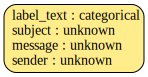

In [ ]:
# @title
print('Auto detected data:\n')
metadata.visualize()

In [ ]:
# @title
metadata.update_column(
    column_name='sender',
    sdtype='email',
    pii=True
)

In [ ]:
# @title
from sdv.single_table import GaussianCopulaSynthesizer

# Step 1: Create the synthesizer
synthesizer = GaussianCopulaSynthesizer(metadata)

# Step 2: Train the synthesizer
synthesizer.fit(email_table)

# Step 3: Generate synthetic data
synthetic_data = synthesizer.sample(num_rows=100)

#Exploratory Data Analysis

## Check columns for null values

In [ ]:
email_table.isna().sum()

label_text     0
subject       41
message       67
sender         0
dtype: int64

## Drop rows which do not contain the subject and email body

In [ ]:
rows_to_remove = email_table[email_table['subject'].isna()&(email_table['message'].isna())].index
email_table.drop(rows_to_remove, inplace=True)

## Analysis to check where subject is missing, where email body is missing

In [ ]:
spam_na_subject = email_table[email_table['subject'].isna()& (email_table['label_text'] == 'spam')]
ham_na_subject = email_table[email_table['subject'].isna()& (email_table['label_text'] == 'ham')]
spam_na_message = email_table[email_table['message'].isna()& (email_table['label_text'] == 'spam')]
ham_na_message = email_table[email_table['message'].isna()& (email_table['label_text'] == 'ham')]

In [ ]:
ham_na_message.head(3)

,label_text,subject,message,sender
1220,ham,fyi - piece on enron,NaN,pump1937@example.com
2647,ham,"recommendations based on job group , mid - yea...",NaN,alumni1992@outlook.com
3136,ham,fyi,NaN,kills1979@yahoo.com


## Fix the missing email body with their subject

In [ ]:
email_table.loc[email_table['message'].isna(), 'message']= email_table.loc[email_table['message'].isna(), 'subject']

## Fill the missing email subject with random phishing email subject

In [ ]:
# Iterate through rows in na_rows_except_value
for index, row in spam_na_subject.iterrows():
    # Randomly choose one of the 5 values
    random_value = np.random.choice(['Urgent Action required!', 'You have 1 day left ', 'Security alert- account access denied'])
    # Set the randomly chosen value in the specific column for the current row
    email_table.at[index, 'subject'] = random_value

## Verify there is no null columns in dataframe

In [ ]:
email_table.isna().sum()

label_text    0
subject       0
message       0
sender        0
dtype: int64

In [ ]:
email_table.head()

,label_text,subject,message,sender
0,ham,rt / volume management meeting,the mt . hood conference room is reserved for ...,usb1887@protonmail.com
1,ham,re : 7 / 14 - - crude oil and nat gas,fyi\n1 . george hopefully will get us some pea...,road1973@example.com
2,ham,re : hello team,ken :\nwe are very excited about our alp at en...,cgi1872@example.com
3,spam,' the antidote ',"hello ,\nwe have an alternative to drugs & ant...",fought1918@live.com
4,spam,"Dear Ferdinand Kahanek,\n\nWe regret to inform...",Your payment status: Verify your account detai...,payment@mićrosoft.com


## Check if there is any duplication in synthetic data generation

In [ ]:
email_table.duplicated().sum()

0

In [ ]:
email_table['label_text'].value_counts()

spam    5994
ham     5938
Name: label_text, dtype: int64

## Visualiztion of class distribution

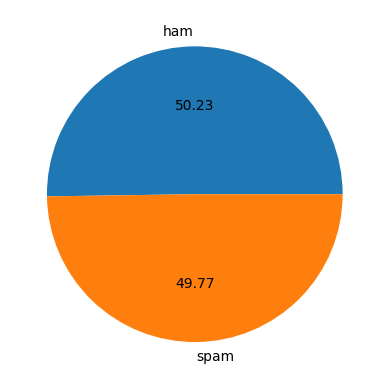

In [ ]:
plt.pie(email_table['label_text'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
email_table.groupby('label_text').describe()

subject                                                            \
             count unique                                                top   
label_text                                                                     
ham           5938   5151               schedule crawler : hourahead failure   
spam          5994   5094  Subject: Urgent: Service Disruption Notificati...   

                message         \
           freq   count unique   
label_text                       
ham          64    5938   5846   
spam        168    5994   3021   

                                                                   sender  \
                                                          top freq  count   
label_text                                                                  
ham         - - - - - - - - - - - - - - - - - - - - - - - ...    4   5938   
spam        YOUR ACCOUNT IS GOING TO BE DELETED. URGENT AC...  168   5994   

                                                                 
           unique                                      top freq  
label_text                                                       
ham          5757                         finance@bank.com   16  
spam         5945  feedback@kaspersky-customer-support.net    3

## Generate point cloud to visualize most occuring words in dataset

In [ ]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0),
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    width=800,
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))

    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud)
    plt.title(title, fontdict={'size': title_size, 'color': 'black',
                              'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

In [ ]:
messages_text = ' '.join(email_table['message'].dropna())

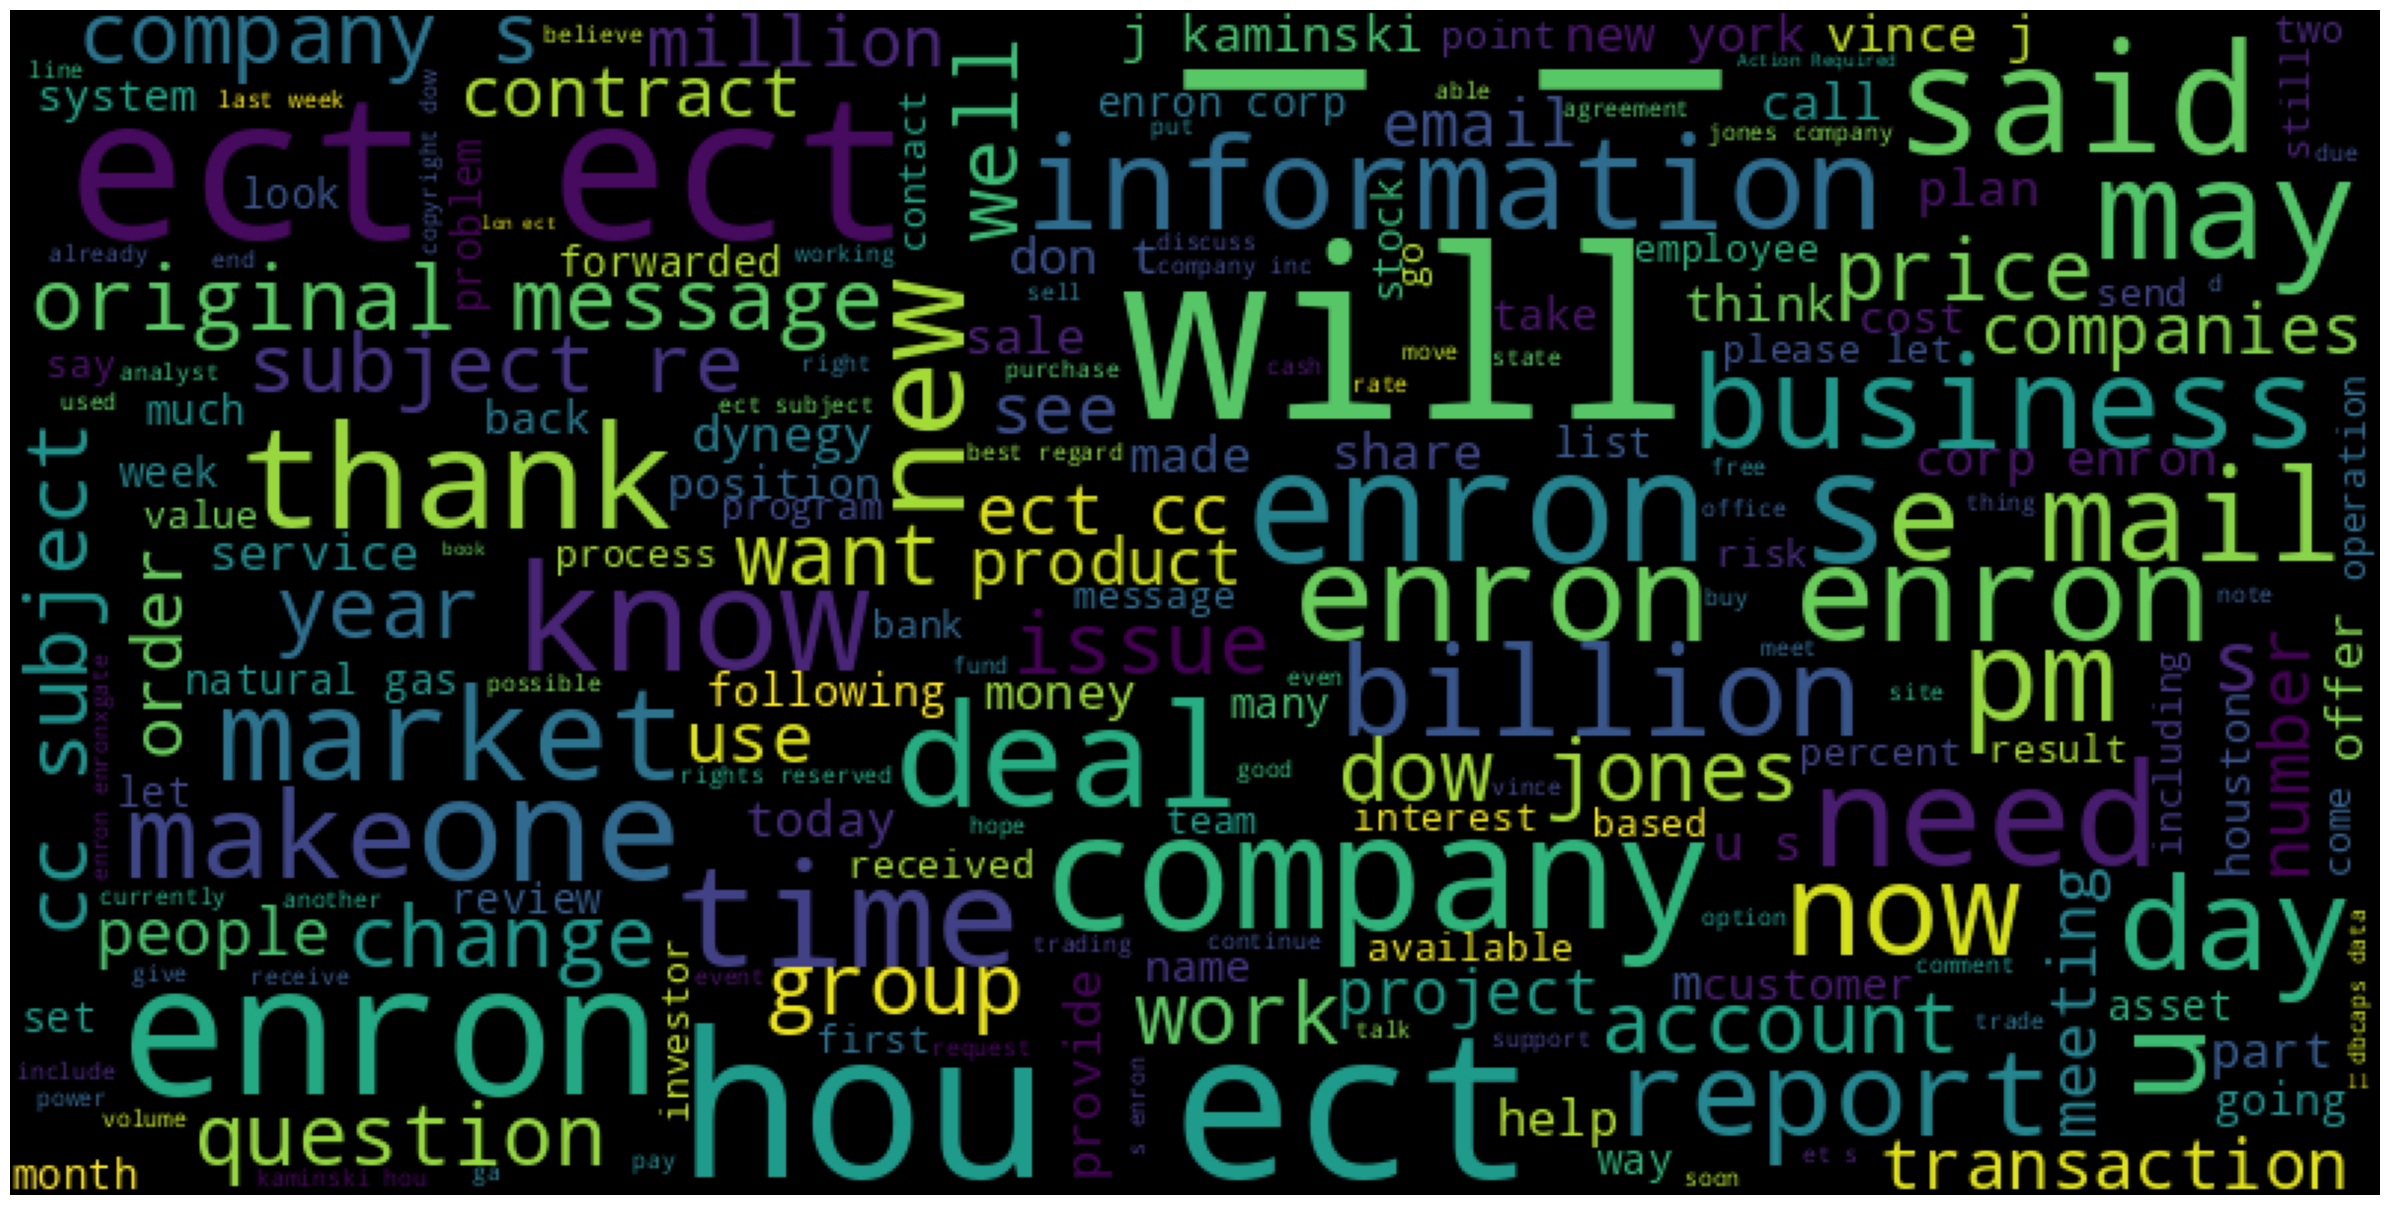

In [ ]:
plot_wordcloud(messages_text)

In [ ]:
email_table['label_text'].unique()

array([0, 1])

## Label encode the target columns with numeric values

In [ ]:
email_table['label_text'] = email_table['label_text'].replace({'ham': 0, 'spam': 1})

## Create a new column in Dataframe contatnating both subject and body

In [ ]:
email_table['input_no_sender'] = email_table['subject'] + ' ' + email_table['message']

## Create a new column in Dataframe contatnating sender mail, subject and body

In [ ]:
email_table['input_with_sender'] = email_table['sender'] + ' ' + email_table['subject'] + ' ' + email_table['message']

In [ ]:
from nltk.tokenize import word_tokenize
import re

## Perprocess raw text to remove sensitive data, stop words, convert words to their root form

In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove punctuation and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

## Apply the pre-processing transformation on input columns

In [ ]:
# Preprocess text data
email_table['input_no_sender'] = email_table['input_no_sender'].apply(preprocess_text)
email_table['input_with_sender'] = email_table['input_with_sender'].apply(preprocess_text)

In [ ]:
backup_email_table = email_table.copy()

## Store the pre-processed input features in a csv file

In [ ]:
email_table.to_csv('preprocessed_email_data.csv', index=False,quoting=csv.QUOTE_ALL)

In [ ]:
email_table.head(1)

,label_text,subject,message,sender,input_no_sender,input_with_sender
0,0,rt / volume management meeting,the mt . hood conference room is reserved for ...,usb1887@protonmail.com,rt volume management meeting mt hood conferenc...,usbprotonmailcom rt volume management meeting ...


In [ ]:
# Extract features and labels
X = email_table['input_no_sender']
y = email_table['label_text']
# Split the dataset in a stratified way
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Converting text to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
print(y_train.value_counts())
print('Test/Val split',y_test.value_counts())

1    4795
0    4750
Name: label_text, dtype: int64
Test/Val split 1    1199
0    1188
Name: label_text, dtype: int64


## References for synthetic data creation, domain understanding, dataset samples

https://www.linkedin.com/pulse/text-classification-exploration-spam-detection-news-varghese-chacko/

https://www.hindawi.com/journals/scn/2022/1862888/

https://archive.ics.uci.edu/dataset/228/sms+spam+collection

https://www.getcybersafe.gc.ca/en/resources/real-examples-fake-emails